In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import seaborn as sns
import scipy.special as sp
import sklearn.datasets as datasets
import sklearn.linear_model as lm
import sklearn.ensemble as en
import sklearn.tree as tree
import econml

#### data generation packages
import strawman_edge
import strawman_center

#### main packages
import characterize

%load_ext jupyter_black

## Experiments

### Strawman (Easy Mode) Example with under represented samples on edge
$P(S=1 \mid X) = 0.25 - 2\left((X_0 > 0.5) (X_0 < 1) (X_1 > 0.5) (X_1 < 1)\right)$ \
$Y(0) = 10 sin(\pi X_0 X_1) + 20 (X_2 - 0.5)^2 + 10 X_3 + 5 X_4 + \epsilon$ \
$Y(1) = Y(0) + log(Y(0) + 1)$

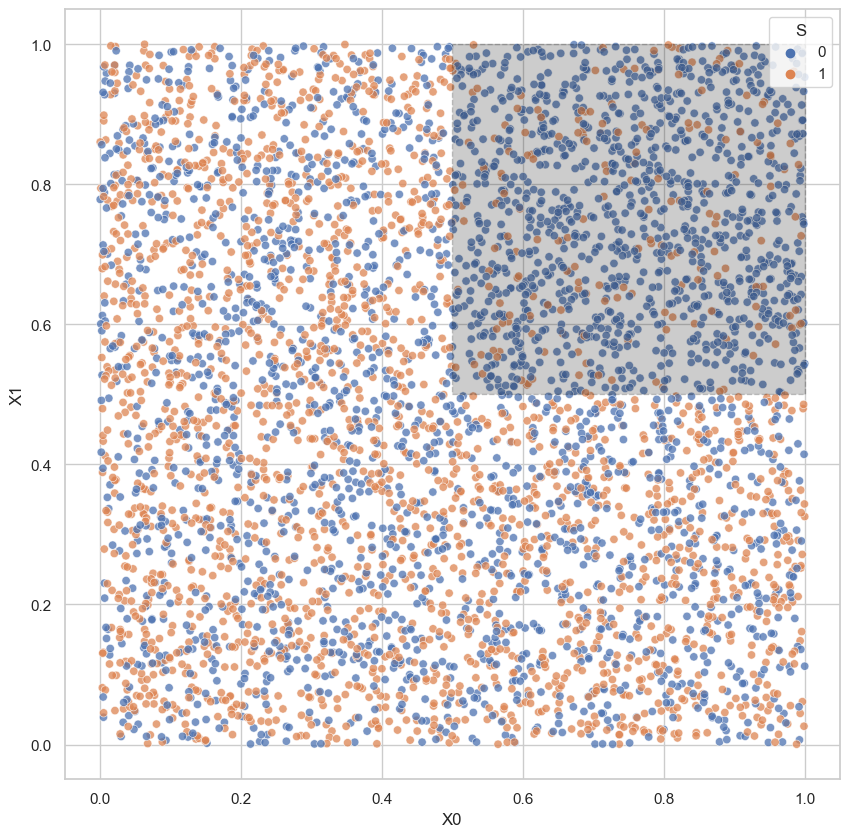

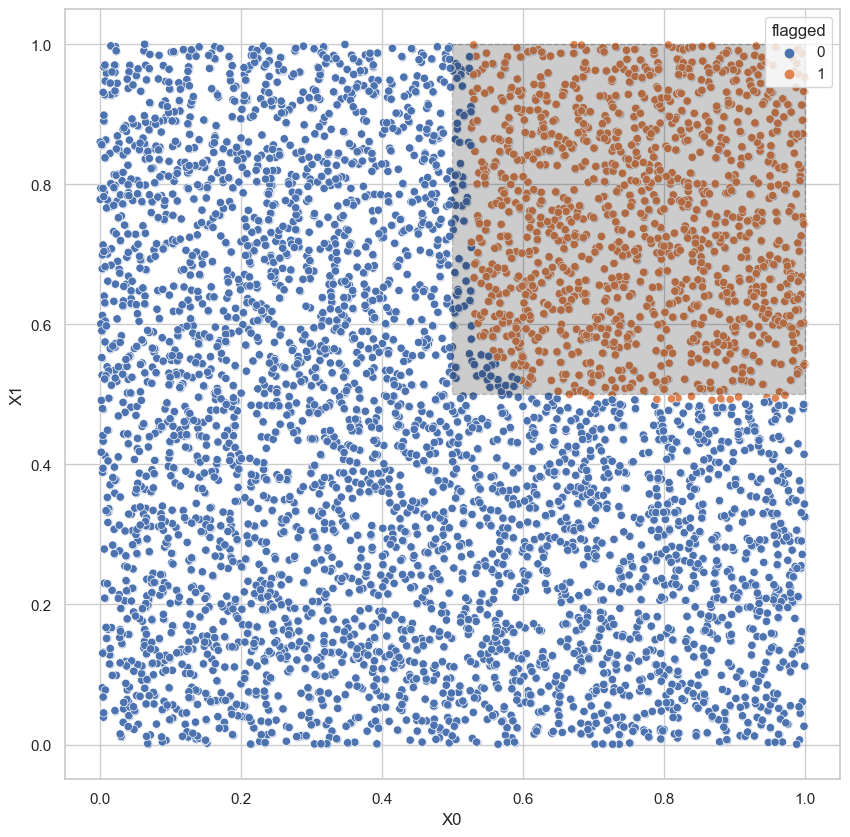

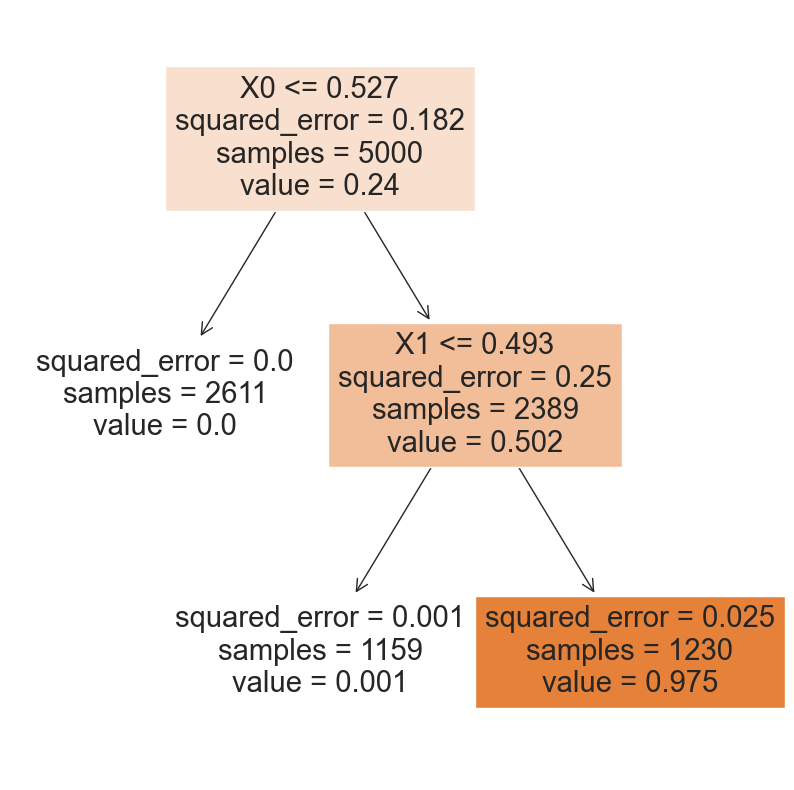

In [2]:
df, Y = strawman_edge.get_data(n=5000, seed=0)

#### plot scatter plot of X0 vs X1 and mark the region that is undersampled in experiment (truth)
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x="X0", y="X1", hue="S", data=df, alpha=0.75, ax=ax)
ax.add_patch(
    Rectangle((0.5, 0.5), 0.5, 0.5, color="black", ls="--", alpha=0.2, fill=True)
)

alpha = [5, 1]
method = "match"
n_neighbors = 1200
p = 6
characterization_depth = 2
matched_groups, result, tau, M, df_result, m_tree = characterize.characterize(
    df, alpha=alpha, method=method, n_neighbors=n_neighbors, p=p
)

#### plot scatter plot of X0 vs X1 and mark the points in the region that is highlighted as undersampled in experiment (est)
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x="X0", y="X1", data=df, alpha=0.75, ax=ax)
sns.scatterplot(
    x="X0",
    y="X1",
    hue="flagged",
    data=df_result,
    ax=ax,
)
ax.add_patch(
    Rectangle((0.5, 0.5), 0.5, 0.5, color="black", ls="--", alpha=0.2, fill=True)
)


#### characterization of the under-sampled space
fig, ax = plt.subplots(figsize=(10, 10))
plot_tree = tree.plot_tree(
    m_tree,
    filled=True,
    ax=ax,
    feature_names=df_result.drop(columns=["Yobs", "T", "S", "flagged"]).columns,
)

In [3]:
M

array([0.39233544, 0.60543533, 0.        , 0.        , 0.        ,
       0.00222923, 0.        , 0.        , 0.        , 0.        ])

### Strawman (Hard Mode) Example with under represented samples in the middle
$P(S=1 \mid X) = 0.25 - 2\left((X_0 > 0.4) (X_0 < 0.6) (X_1 > 0.4) (X_1 < 0.6)\right)$ \
$Y(0) = 10 sin(\pi X_0 X_1) + 20 (X_2 - 0.5)^2 + 10 X_3 + 5 X_4 + \epsilon$ \
$Y(1) = Y(0) + log(Y(0) + 1)$